## Load Libraries

In [26]:
install.packages("fastR2")
library("rcompanion")
library("fastR2")
library("car")
library(tidyverse)


The downloaded binary packages are in
	/var/folders/7y/95y2flc95xd_kqlcm2mtqjp00000gn/T//Rtmpno8BAH/downloaded_packages


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.6     ✔ purrr   0.3.4
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ mosaic::count()            masks dplyr::count()
✖ purrr::cross()             masks mosaic::cross()
✖ mosaic::do()               masks dplyr::do()
✖ tidyr::expand()            masks Matrix::expand()
✖ dplyr::filter()            masks stats::filter()
✖ ggstance::geom_errorbarh() masks ggplot2::geom_errorbarh()
✖ dplyr::lag()               masks stats::lag()
✖ tidyr::pack()              masks Matrix::pack()
✖ car::recode()              masks dplyr::recode()
✖ purrr::some()              masks car::some()
✖ mosaic::stat()             masks ggplot2::stat()
✖ mosaic::tally()            masks dplyr::tally()
✖ tidyr::unpack()            masks Matrix::unpack()


## Load Data

In [8]:
breakfast <- read.csv("/Users/kenyashiafernandez/Downloads/breakfast.csv")

In [6]:
head(breakfast)

,Participant.Code,Treatment.Group,Age..y.,Sex,Height..m.,Baseline.Body.Mass..kg.,Follow.Up.Body.Mass..kg.,Baseline.Lean.Tissue.Mass..kg.,Follow.Up.Lean.Tissue.Mass..kg.,Baseline.Adipose.Tissue.Mass..kg.,⋯,Week.1.Mean.Afternoon.Evening.Interstitial.Glucose..mmol.l.,Week.6.Mean.Afternoon.Evening.Interstitial.Glucose..mmol.l.,Week.1.CV.Afternoon.Evening.Interstitial.Glucose....,Week.6.CV.Afternoon.Evening.Interstitial.Glucose....,Week.1.Peak.Sleeping.Interstitial.Glucose..mmol.l.,Week.6.Peak.Sleeping.Interstitial.Glucose..mmol.l.,Week.1.Mean.Sleeping.Interstitial.Glucose..mmol.l.,Week.6.Mean.Sleeping.Interstitial.Glucose..mmol.l.,Week.1.CV.Sleeping.Interstitial.Glucose....,Week.6.CV.Sleeping.Interstitial.Glucose....
,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,Fasting,27,Female,1.75,71.5,71.1,51.8,52.4,15.1,⋯,5.5,5.2,13.8,14.7,6.5,7.8,5.2,5.6,9.0,15.7
2,4,Fasting,25,Female,1.72,74.6,73.8,50.4,51.7,21.0,⋯,5.7,5.8,9.0,11.0,6.3,6.8,5.6,5.6,6.9,9.1
3,11,Fasting,44,Male,1.64,68.0,68.1,46.7,47.0,17.9,⋯,5.7,5.4,17.4,12.6,7.1,7.5,5.6,5.5,11.6,13.1
4,14,Fasting,36,Female,1.68,57.0,57.3,41.0,41.9,13.6,⋯,5.2,5.2,16.7,16.4,7.3,7.7,5.2,5.5,11.0,10.1
5,16,Fasting,28,Female,1.64,49.4,49.0,36.4,35.9,10.1,⋯,4.7,5.1,12.7,15.6,6.2,9.4,4.9,5.3,9.2,17.7
6,19,Fasting,38,Male,1.74,64.3,64.0,50.0,49.3,11.1,⋯,5.3,5.5,19.8,14.7,6.8,6.9,4.9,5.4,15.8,8.7


## Overall, regardless of whether participants ate breakfast or not, did people in this study show improvement in their resting metabolic rate?  

## Data Wrangling 

### Removing Extra Rows

In [9]:
breakfast1 <- breakfast[1:33,1:7]

### Reshaping the Data

In [18]:
keeps <- c("Participant.Code", "Treatment.Group", "Age..y.", "Sex", "Height..m.", "Baseline.Resting.Metabolic.Rate..kcal.d.", "Follow.Up.Resting.Metabolic.Rate..kcal.d.")

In [19]:
breakfast2 <- breakfast1[keeps]

In [20]:
breakfast3 <- breakfast2[,1:5]
breakfast3$repdat <- breakfast2$Baseline.Body.Mass..kg.
breakfast3$contrasts <- "T1"

In [21]:
breakfast4 <- breakfast2[,1:5]
breakfast4$repdat <- breakfast2$Follow.Up.Body.Mass..kg.
breakfast4$contrasts <- "T2"

In [22]:
breakfast5 <- rbind(breakfast3, breakfast4)

## Testing Assumptions

### Normality

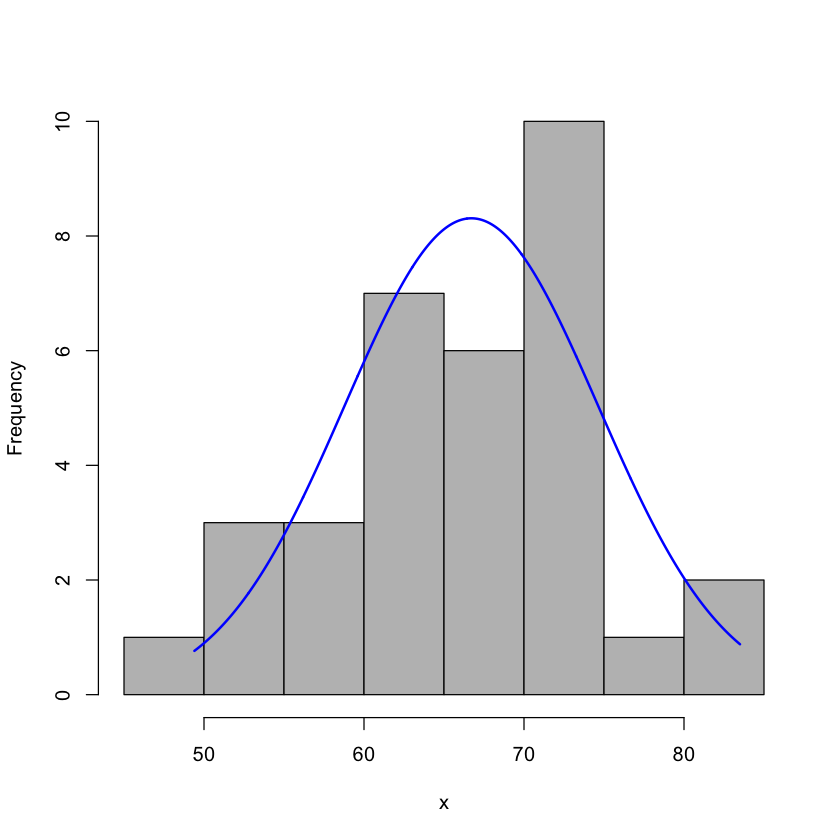

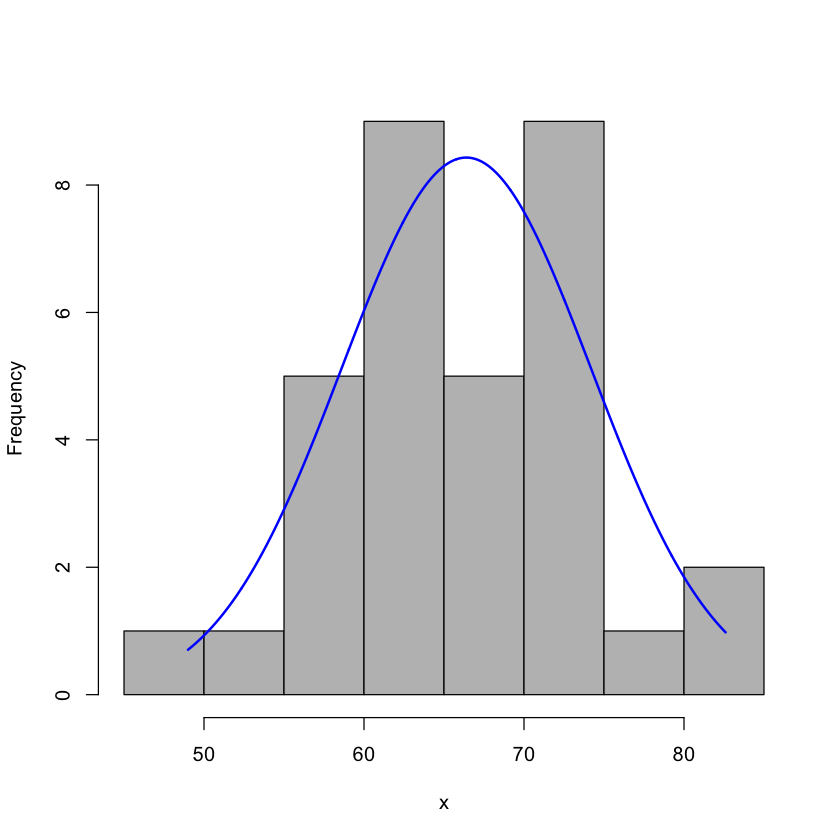

In [23]:
plotNormalHistogram(breakfast1$Baseline.Body.Mass..kg.)
plotNormalHistogram(breakfast1$Follow.Up.Body.Mass..kg.)

## Homogeneity of Varience

In [24]:
leveneTest(repdat ~ Treatment.Group*contrasts, data=breakfast5)

ERROR: Error in eval(predvars, data, env): object 'repdat' not found


## Analysis

In [25]:
RManova2 <- aov(repdat~contrasts+Error(Participant.Code), breakfast5)
summary(RManova2)

ERROR: Error in eval(predvars, data, env): object 'repdat' not found
